In [201]:
#Dissertation Code 

#If use ofsted - question becomes about access to good schools
#If use GCSE pass rate - question becomes about the actual quality of schools

#Make binary variables by grouping school types into ones that can chage their curriculum or 
#those that are not state funded foe example - need to look at school types to do this 

#Use multiple regressions?
#Integrate ofsted rating as well as GCSE pass rate?
#Which way does correlation go?


#Community schools = state funded, with the local authority being responsible for the premises, staffing and admissions.

#Voluntary aided schools =type of state school, still funded by the local authority, but a foundation or trust 
#contributes to building costs and has a large say in the running of the schools. Usually faith schools.

#Voluntary controlled schools = mix of community and voluntary aided schools. State funded; the local authority employs
#staff and sets the entrance criteria, but a foundation or trust has some influence in the running of the school. 
#These are also usually faith schools. 

#Foundation schools = state funded but a governing body controls admissions. 
#The governing body has more freedom in controlling the proceedings than in community schools. 

#The following school types will be types of academies. 
#Sponsor led academies = mostly underperforming schools who have been encouraged to convert to an academy run by 
#sponsors, who are responsible for improving performance. Not run by the local authority, are state funded, do not 
#have to follow the national curriculum (although they are required to keep a balanced curriculum). 
#A sponsor can be an organisation or individual that has received approval by the Department for Education, 
#to support an academy. 

#Converter academies = schools who had Ofsted ratings of “Good” or “Outstanding”, that applied to become academies. 
#Same characteristics of sponsor led academies, with the only difference being that there is no need for a sponsor.  

#Free schools are government funded but are not run by the local authority. They can set their own pay and 
#staff conditions, do not have to follow the national curriculum and can alter the length of school terms and days. 

#Studio schools are a type of free school, designed to give students workplace skills as well as 
#traditional qualifications. They are usually small and have close ties to employers. 

#University technical colleges are state funded, not run by the local authority and are sponsored by a university. 
#They usually specialise in certain subjects such as engineering and construction.Do not follow the national curriculum,
#with their curriculum being designed by the university. 



In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import geopandas as gpd
import sys
#!{sys.executable} -m pip install geojson
import geojson
#!{sys.executable} -m pip install geoplot
import geoplot
import geoplot.crs as gcrs

#10, 12, 7,8 -> special schools (get rid of)

In [2]:
#Importing Dataset and Cleaning 
df = pd.read_csv(r'C:/Users/tejhi/OneDrive/Documents/YEAR 3 Econ/EC3401 - Mini Dissertation/DATA/Merged_Secondary.csv',
                low_memory=False)

#Getting rid of primary schools 
df=df[df.phaseofeducationname != "Primary"]

#Dropping unwanted columns 
df=df.drop(["nurseryprovisionname","schoolwebsite","msoaname","lsoaname","previouslacode","previouslaname",
            "previousestablishmentnumber","qabreport","chnumber","msoacode","lsoacode",
           "phaseofeducationname","statutorylowage","statutoryhighage","religiousethosname",
           "diocesecode","diocesename","religiouscharactername","religiouscharactercode","ukprn",
           "locality","address3","town","countyname","urbanruralcode","urbanruralname","gsslacodename",
           "easting","northing","inspectoratenamename","rscregionname","countryname","geography","depr_pop",
           "depr_none","depr_onedim","depr_twodim","depr_threedim","depr_fourdim","hhldsize_0",
           "ethn_pop_asian_bang","ethn_pop_asian_chin","ethn_pop_asian_indi","ethn_pop_asian_paki",
           "ethn_pop_asian_other","ethn_pop_black_afri","ethn_pop_black_cari","ethn_pop_black_other",
           "ethn_pop_mixed_whitasia","ethn_pop_mixed_whitblacafr","ethn_pop_mixed_whitblaccari",
           "ethn_mixed_other","ethn_white_british","ethn_white_irish","ethn_white_gyptrav","ethn_white_roma",
           "ethn_white_other","ethn_other_arab","ethn_other_anyother","hhldlang_pop","hhldlang_alleng",
           "hhldlang_atleastone","hhldlang_noadult","hhldlang_noeng","multi_lang_pop","multi_lang_onepers",
           "multi_lang_allsame","multi_lang_btwngen","multi_lang_btwnpart","multi_lang_anycomb","opendate",
            "reasonestablishmentopenedname","establishmenttypegroupname",
           "reasonestablishmentopenedcode","reasonestablishmentclosedcode","reasonestablishmentclosedname",
           "closedate","censusdate","gendername","boarderscode","boardersname","religiousethosname",
           "specialclassescode","specialclassesname","trustschoolflagcode","trustschoolflagname",
            "trustscode","trustsname","qabnamecode","qabnamename","establishmentaccreditedcode",
            "establishmentaccreditedname","headtitlename","headfirstname","headlastname","headpreferredjobtitle",
            "bsoinspectoratenamename","estab","schname","schname_ac",'telephonenum','inspectoratereport',
            'dateoflastinspectionvisit','nextinspectionvisit','teenmothname','teenmothplaces',
           'federationflagname','federationscode',"federationsname","feheidentifier",
           'furthereducationtypename','ofstedlastinsp','ofstedspecialmeasuresname','ccfname','senpruname',
           'ebdname','placespru','ftprovname','edbyothername','section41approvedname','sen1name','sen2name',
           'sen3name','sen4name','sen5name','sen6name','sen7name','sen8name','sen9name','sen10name','sen11name',
           'sen12name','sen13name','typeofresourcedprovisionname','resourcedprovisiononroll',
           'resourcedprovisioncapacity','senunitonroll','senunitcapacity','senstat','sennostat',
            'boardingestablishmentname','propsname','sitename','accreditationexpirydate',
           'schoolsponsorsname','admissionspolicyname'],axis=1)

In [3]:
#Getting rid of special schools 

df= df.drop(df[df['typeofestablishmentcode']==7].index)
df= df.drop(df[df['typeofestablishmentcode']==8].index)
df= df.drop(df[df['typeofestablishmentcode']==10].index)
df= df.drop(df[df['typeofestablishmentcode']==12].index)

In [4]:
#Getting rid of closed schools 

df=df.drop(df[df['establishmentstatuscode']!=1].index)

In [5]:
#Creating a standardised variable for GCSE 4-9 pass rate 

#df.describe()
#mean = 59.826077
#sd= 28.469303
def standardize(s):
    return (s['pct4_9'] - df['pct4_9'].mean() / df['pct4_9'].std())

df['Standardised GCSE Pass Rate']=df.apply(standardize,axis=1)

In [6]:
#Creating binary variables for if schools follow the national curriculum -> if they do the value is 1 



def nc_conditions(s):
    if (s['typeofestablishmentcode'] ==1) or (s['typeofestablishmentcode'] == 2) or (s['typeofestablishmentcode'] == 3) or (s['typeofestablishmentcode']==5) or (s['typeofestablishmentcode']==41):
        return 1
    else:
        return 0

df['NC'] = df.apply(nc_conditions, axis=1)

#df[1670:1690]
#df.head(20)

In [7]:
#Creating a binary variable for if schools are academies or not -> if they are the value is 1 

def ac_conditions(s):
    if (s['establishmenttypegroupcode'] ==10):
        return 1
    else:
        return 0

df['AC'] = df.apply(ac_conditions, axis=1)

#df[1670:1690]
#df.head(20)

In [8]:
#Creating a binary variable for if schools have sxith forms or not -> if they dothe value is 1 

def sixform_conditions(s):
    if (s['officialsixthformcode'] == 1):
        return 1
    else:
        return 0

df['S'] = df.apply(sixform_conditions, axis=1)

pd.set_option('display.max_columns', None)
#df[1670:1690]
df.head(2)

,geographycode,urn,lacode,laname,establishmentnumber,establishmentname,typeofestablishmentcode,typeofestablishmentname,establishmenttypegroupcode,establishmentstatuscode,establishmentstatusname,phaseofeducationcode,officialsixthformcode,officialsixthformname,gendercode,admissionspolicycode,schoolcapacity,numberofpupils,numberofboys,numberofgirls,percentagefsm,schoolsponsorflagname,ofstedspecialmeasurescode,lastchangeddate,street,postcode,gorcode,gorname,districtadministrativename,administrativewardcode,administrativewardname,parliamentaryconstituencycode,parliamentaryconstituencyname,ofstedratingname,uprn,fsm,date,hhldcomp_pop,hhldcomp_onepers,hhldcomp_onepers_66plus,hhldcomp_onepers_not66plus,hhldcomp_singfam,hhldcomp_singfam_all66plus,hhldcomp_singfam_married,hhldcomp_singfam_married_nochild,hhldcomp_singfam_married_depchil,hhldcomp_singfam_married_nondepc,hhldcomp_singfam_cohab,hhldcomp_singfam_cohab_nochild,hhldcomp_singfam_cohab_depchild,hhldcomp_singfam_cohab_nondepchi,hhldcomp_singfam_lonepar,hhldcomp_singfam_lonepar_depchil,hhldcomp_singfam_lonepar_nondepc,hhldcomp_singfam_other,hhldcomp_singfam_other2,hhldcomp_other,hhldcomp_other_depchild,hhldcomp_other_all66plus,age_pop,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,sex_pop,sex_female,sex_male,hhldsize_pop,hhldsize_1,hhldsize_2,hhldsize_3,hhldsize_4,hhldsize_5,hhldsize_6,hhldsize_7,hhldsize_8,ethn_pop,ethn_pop_asian,ethn_pop_black,ethn_pop_mixed,ethn_white,ethn_other,highqual_pop,highqual_noqual,highqual_level1,highqual_level2,highqual_apprent,highqual_level3,highqual_level4,highqual_other,rectype,lea,pcode,ptl2basics_94,pct4_9,_merge,Standardised GCSE Pass Rate,NC,AC,S
0,E09000001,100001,201,City of London,6005,City of London School for Girls,11,Other independent school,3,1,Open,0,1,Has a sixth form,2,2,820.0,739.0,0.0,739.0,0.0,Not applicable,0,26/09/2023,St Giles' Terrace,EC2Y 8BB,H,London,City of London,E05009302,Cripplegate,E14000639,Cities of London and Westminster,NaN,2.000000e+11,0.0,2021.0,4916.0,2506.0,494.0,2012.0,1983.0,201.0,846.0,523.0,253.0,70.0,665.0,598.0,57.0,10.0,175.0,90.0,85.0,96.0,96.0,427.0,31.0,396.0,8580.0,213.0,159.0,174.0,216.0,965.0,1213.0,1002.0,726.0,547.0,544.0,640.0,517.0,458.0,393.0,318.0,210.0,164.0,121.0,8583.0,3861.0,4722.0,4914.0,2506.0,1767.0,371.0,190.0,52.0,11.0,7.0,10.0,8584.0,1445.0,232.0,470.0,5955.0,482.0,8006.0,529.0,223.0,392.0,80.0,708.0,5939.0,135.0,1,201,EC2Y 8BB,0%,0.0,Matched (3),-2.084684,0,0,1
1,E09000001,100003,201,City of London,6007,City of London School,11,Other independent school,3,1,Open,0,1,Has a sixth form,1,0,1060.0,1045.0,1045.0,0.0,0.0,Not applicable,0,27/11/2023,107 Queen Victoria Street,EC4V 3AL,H,London,City of London,E05009309,Queenhithe,E14000639,Cities of London and Westminster,NaN,1.000230e+11,0.0,2021.0,4916.0,2506.0,494.0,2012.0,1983.0,201.0,846.0,523.0,253.0,70.0,665.0,598.0,57.0,10.0,175.0,90.0,85.0,96.0,96.0,427.0,31.0,396.0,8580.0,213.0,159.0,174.0,216.0,965.0,1213.0,1002.0,726.0,547.0,544.0,640.0,517.0,458.0,393.0,318.0,210.0,164.0,121.0,8583.0,3861.0,4722.0,4914.0,2506.0,1767.0,371.0,190.0,52.0,11.0,7.0,10.0,8584.0,1445.0,232.0,470.0,5955.0,482.0,8006.0,529.0,223.0,392.0,80.0,708.0,5939.0,135.0,1,201,EC4V 3AL,100%,100.0,Matched (3),97.915316,0,0,1


In [9]:
#Creating a binary variable for if schools are mixed gender or not -> if they are the value is 1 

def mixed_conditions(s):
    if (s['gendercode'] ==3):
        return 1
    else:
        return 0

df['Mixed'] = df.apply(mixed_conditions, axis=1)

pd.set_option('display.max_columns', None)
#df[1670:1690]
df.head(2)

,geographycode,urn,lacode,laname,establishmentnumber,establishmentname,typeofestablishmentcode,typeofestablishmentname,establishmenttypegroupcode,establishmentstatuscode,establishmentstatusname,phaseofeducationcode,officialsixthformcode,officialsixthformname,gendercode,admissionspolicycode,schoolcapacity,numberofpupils,numberofboys,numberofgirls,percentagefsm,schoolsponsorflagname,ofstedspecialmeasurescode,lastchangeddate,street,postcode,gorcode,gorname,districtadministrativename,administrativewardcode,administrativewardname,parliamentaryconstituencycode,parliamentaryconstituencyname,ofstedratingname,uprn,fsm,date,hhldcomp_pop,hhldcomp_onepers,hhldcomp_onepers_66plus,hhldcomp_onepers_not66plus,hhldcomp_singfam,hhldcomp_singfam_all66plus,hhldcomp_singfam_married,hhldcomp_singfam_married_nochild,hhldcomp_singfam_married_depchil,hhldcomp_singfam_married_nondepc,hhldcomp_singfam_cohab,hhldcomp_singfam_cohab_nochild,hhldcomp_singfam_cohab_depchild,hhldcomp_singfam_cohab_nondepchi,hhldcomp_singfam_lonepar,hhldcomp_singfam_lonepar_depchil,hhldcomp_singfam_lonepar_nondepc,hhldcomp_singfam_other,hhldcomp_singfam_other2,hhldcomp_other,hhldcomp_other_depchild,hhldcomp_other_all66plus,age_pop,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,sex_pop,sex_female,sex_male,hhldsize_pop,hhldsize_1,hhldsize_2,hhldsize_3,hhldsize_4,hhldsize_5,hhldsize_6,hhldsize_7,hhldsize_8,ethn_pop,ethn_pop_asian,ethn_pop_black,ethn_pop_mixed,ethn_white,ethn_other,highqual_pop,highqual_noqual,highqual_level1,highqual_level2,highqual_apprent,highqual_level3,highqual_level4,highqual_other,rectype,lea,pcode,ptl2basics_94,pct4_9,_merge,Standardised GCSE Pass Rate,NC,AC,S,Mixed
0,E09000001,100001,201,City of London,6005,City of London School for Girls,11,Other independent school,3,1,Open,0,1,Has a sixth form,2,2,820.0,739.0,0.0,739.0,0.0,Not applicable,0,26/09/2023,St Giles' Terrace,EC2Y 8BB,H,London,City of London,E05009302,Cripplegate,E14000639,Cities of London and Westminster,NaN,2.000000e+11,0.0,2021.0,4916.0,2506.0,494.0,2012.0,1983.0,201.0,846.0,523.0,253.0,70.0,665.0,598.0,57.0,10.0,175.0,90.0,85.0,96.0,96.0,427.0,31.0,396.0,8580.0,213.0,159.0,174.0,216.0,965.0,1213.0,1002.0,726.0,547.0,544.0,640.0,517.0,458.0,393.0,318.0,210.0,164.0,121.0,8583.0,3861.0,4722.0,4914.0,2506.0,1767.0,371.0,190.0,52.0,11.0,7.0,10.0,8584.0,1445.0,232.0,470.0,5955.0,482.0,8006.0,529.0,223.0,392.0,80.0,708.0,5939.0,135.0,1,201,EC2Y 8BB,0%,0.0,Matched (3),-2.084684,0,0,1,0
1,E09000001,100003,201,City of London,6007,City of London School,11,Other independent school,3,1,Open,0,1,Has a sixth form,1,0,1060.0,1045.0,1045.0,0.0,0.0,Not applicable,0,27/11/2023,107 Queen Victoria Street,EC4V 3AL,H,London,City of London,E05009309,Queenhithe,E14000639,Cities of London and Westminster,NaN,1.000230e+11,0.0,2021.0,4916.0,2506.0,494.0,2012.0,1983.0,201.0,846.0,523.0,253.0,70.0,665.0,598.0,57.0,10.0,175.0,90.0,85.0,96.0,96.0,427.0,31.0,396.0,8580.0,213.0,159.0,174.0,216.0,965.0,1213.0,1002.0,726.0,547.0,544.0,640.0,517.0,458.0,393.0,318.0,210.0,164.0,121.0,8583.0,3861.0,4722.0,4914.0,2506.0,1767.0,371.0,190.0,52.0,11.0,7.0,10.0,8584.0,1445.0,232.0,470.0,5955.0,482.0,8006.0,529.0,223.0,392.0,80.0,708.0,5939.0,135.0,1,201,EC4V 3AL,100%,100.0,Matched (3),97.915316,0,0,1,0


In [10]:
#Creating a variable for ofsted rating (1-4)
#4 = outstanding, 3=good, 2=req improvment, 1=inadequate ->serious weaknesses + special measures

#serious weaknesses + speical measures come under inadequate so will group all as one 

def ofstedcode(s):
    if (s['ofstedratingname'] =='Outstanding'):
        return 4
    elif(s['ofstedratingname'] =='Good'):
        return 3
    elif(s['ofstedratingname'] =='Requires improvement'):
        return 2
    elif(s['ofstedratingname'] =='Inadequate'):
        return 1
    elif(s['ofstedratingname'] =='Serious Weaknesses'):
        return 1
    elif(s['ofstedratingname'] =='Special Measures'):
        return 1
    else:
        return 0
    
df['ofstedratingcode'] = df.apply(ofstedcode, axis=1)
#df[1670:1690]
df.head(5)

,geographycode,urn,lacode,laname,establishmentnumber,establishmentname,typeofestablishmentcode,typeofestablishmentname,establishmenttypegroupcode,establishmentstatuscode,establishmentstatusname,phaseofeducationcode,officialsixthformcode,officialsixthformname,gendercode,admissionspolicycode,schoolcapacity,numberofpupils,numberofboys,numberofgirls,percentagefsm,schoolsponsorflagname,ofstedspecialmeasurescode,lastchangeddate,street,postcode,gorcode,gorname,districtadministrativename,administrativewardcode,administrativewardname,parliamentaryconstituencycode,parliamentaryconstituencyname,ofstedratingname,uprn,fsm,date,hhldcomp_pop,hhldcomp_onepers,hhldcomp_onepers_66plus,hhldcomp_onepers_not66plus,hhldcomp_singfam,hhldcomp_singfam_all66plus,hhldcomp_singfam_married,hhldcomp_singfam_married_nochild,hhldcomp_singfam_married_depchil,hhldcomp_singfam_married_nondepc,hhldcomp_singfam_cohab,hhldcomp_singfam_cohab_nochild,hhldcomp_singfam_cohab_depchild,hhldcomp_singfam_cohab_nondepchi,hhldcomp_singfam_lonepar,hhldcomp_singfam_lonepar_depchil,hhldcomp_singfam_lonepar_nondepc,hhldcomp_singfam_other,hhldcomp_singfam_other2,hhldcomp_other,hhldcomp_other_depchild,hhldcomp_other_all66plus,age_pop,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,sex_pop,sex_female,sex_male,hhldsize_pop,hhldsize_1,hhldsize_2,hhldsize_3,hhldsize_4,hhldsize_5,hhldsize_6,hhldsize_7,hhldsize_8,ethn_pop,ethn_pop_asian,ethn_pop_black,ethn_pop_mixed,ethn_white,ethn_other,highqual_pop,highqual_noqual,highqual_level1,highqual_level2,highqual_apprent,highqual_level3,highqual_level4,highqual_other,rectype,lea,pcode,ptl2basics_94,pct4_9,_merge,Standardised GCSE Pass Rate,NC,AC,S,Mixed,ofstedratingcode
0,E09000001,100001,201,City of London,6005,City of London School for Girls,11,Other independent school,3,1,Open,0,1,Has a sixth form,2,2,820.0,739.0,0.0,739.0,0.000000,Not applicable,0,26/09/2023,St Giles' Terrace,EC2Y 8BB,H,London,City of London,E05009302,Cripplegate,E14000639,Cities of London and Westminster,NaN,2.000000e+11,0.0,2021.0,4916.0,2506.0,494.0,2012.0,1983.0,201.0,846.0,523.0,253.0,70.0,665.0,598.0,57.0,10.0,175.0,90.0,85.0,96.0,96.0,427.0,31.0,396.0,8580.0,213.0,159.0,174.0,216.0,965.0,1213.0,1002.0,726.0,547.0,544.0,640.0,517.0,458.0,393.0,318.0,210.0,164.0,121.0,8583.0,3861.0,4722.0,4914.0,2506.0,1767.0,371.0,190.0,52.0,11.0,7.0,10.0,8584.0,1445.0,232.0,470.0,5955.0,482.0,8006.0,529.0,223.0,392.0,80.0,708.0,5939.0,135.0,1,201,EC2Y 8BB,0%,0.0,Matched (3),-2.084684,0,0,1,0,0
1,E09000001,100003,201,City of London,6007,City of London School,11,Other independent school,3,1,Open,0,1,Has a sixth form,1,0,1060.0,1045.0,1045.0,0.0,0.000000,Not applicable,0,27/11/2023,107 Queen Victoria Street,EC4V 3AL,H,London,City of London,E05009309,Queenhithe,E14000639,Cities of London and Westminster,NaN,1.000230e+11,0.0,2021.0,4916.0,2506.0,494.0,2012.0,1983.0,201.0,846.0,523.0,253.0,70.0,665.0,598.0,57.0,10.0,175.0,90.0,85.0,96.0,96.0,427.0,31.0,396.0,8580.0,213.0,159.0,174.0,216.0,965.0,1213.0,1002.0,726.0,547.0,544.0,640.0,517.0,458.0,393.0,318.0,210.0,164.0,121.0,8583.0,3861.0,4722.0,4914.0,2506.0,1767.0,371.0,190.0,52.0,11.0,7.0,10.0,8584.0,1445.0,232.0,470.0,5955.0,482.0,8006.0,529.0,223.0,392.0,80.0,708.0,5939.0,135.0,1,201,EC4V 3AL,100%,100.0,Matched (3),97.915316,0,0,1,0,0
2,E09000007,100049,202,Camden,4104,Haverstock School,1,Community school,4,1,Open,4,1,Has a sixth form,3,4,1336.0,982.0,559.0,423.0,63.500000,Not applicable,0,15/11/2023,24 Haverstock Hill,NW3 2BQ,H,London,Camden,E05013660,Haverstock,E14000750,Holborn and St Pancras,Good,1.009182e+10,457.0,2021.0,92758.0,35931.0,9718.0,26213.0,45716.0,3004.0,20511.0,6724.0,11082.0,2705.0,9986.0,7897.0,1767.0,322.0,10559.0,5945.0,4614.0,1656.0,1656.0,11111.0,2273.0,8838.0,210135.0,10032.0,9873.0,10388.0,13743.0,20165.0,22002.0,20541.0,16548.0,14500.0,13360.0,13267.0,11746.0,9141.0,7123.0,6543.0,

In [11]:
#Creating var for proportion for different ethnic populations in local authority of the school 


#Bangladesh, chinese, indian, pakistani, other
df['Proportion_Asian']=df['ethn_pop_asian'] / df['ethn_pop']

In [12]:
#Carribean, african, other
df['Proportion_Black']=df['ethn_pop_black'] / df['ethn_pop']

In [13]:
#white/asian, white/carribean, white/african, other
df['Proportion_Mixed']=df['ethn_pop_mixed']/df['ethn_pop']

In [14]:
#irish, british, gypsy traveller, romanian, other
df['Proportion_White']=df['ethn_white']/df['ethn_pop']

In [15]:
#any other ethnicity 
df['Proportion_Other']=df['ethn_other']/df['ethn_pop']

In [16]:
#Creating dummy var for each GOR region that the school is in -> can correlate w/ofsted rating to see access to better
#schooling 

def gor_lon(s):
    if (s['gorname'] =='London'):
        return 1
    else:
        return 0

df['GOR_London']=df.apply(gor_lon, axis=1)

In [17]:
def gor_north_west(s):
    if (s['gorname'] =='North West'):
        return 1
    else:
        return 0

df['GOR_North_West']=df.apply(gor_north_west, axis=1)

In [18]:
def gor_north_east(s):
    if (s['gorname'] =='North East'):
        return 1
    else:
        return 0

df['GOR_North_East']=df.apply(gor_north_east, axis=1)

In [19]:
def gor_yorkshire(s):
    if (s['gorname'] =='Yorkshire and the Humber'):
        return 1
    else:
        return 0

df['GOR_Yorkshire_Humber']=df.apply(gor_yorkshire, axis=1)

In [20]:
def gor_southeast(s):
    if (s['gorname'] =='South East'):
        return 1
    else:
        return 0

df['GOR_South_East']=df.apply(gor_southeast, axis=1)

In [21]:
def gor_southwest(s):
    if (s['gorname'] =='South West'):
        return 1
    else:
        return 0

df['GOR_South_West']=df.apply(gor_southwest, axis=1)

In [22]:
def gor_eastmidlands(s):
    if (s['gorname'] =='East Midlands'):
        return 1
    else:
        return 0

df['GOR_East_Midlands']=df.apply(gor_eastmidlands, axis=1)

In [23]:
def gor_westmidlands(s):
    if (s['gorname'] =='West Midlands'):
        return 1
    else:
        return 0

df['GOR_West_Midlands']=df.apply(gor_westmidlands, axis=1)

In [24]:
def gor_eastengland(s):
    if (s['gorname'] =='East of England'):
        return 1
    else:
        return 0

df['GOR_East_of_England']=df.apply(gor_eastengland, axis=1)

In [25]:
df['gorname'].value_counts()

South East                  729
London                      727
North West                  585
West Midlands               524
East of England             507
South West                  429
Yorkshire and the Humber    406
East Midlands               375
North East                  190
Name: gorname, dtype: int64

In [26]:
df.head()

,geographycode,urn,lacode,laname,establishmentnumber,establishmentname,typeofestablishmentcode,typeofestablishmentname,establishmenttypegroupcode,establishmentstatuscode,establishmentstatusname,phaseofeducationcode,officialsixthformcode,officialsixthformname,gendercode,admissionspolicycode,schoolcapacity,numberofpupils,numberofboys,numberofgirls,percentagefsm,schoolsponsorflagname,ofstedspecialmeasurescode,lastchangeddate,street,postcode,gorcode,gorname,districtadministrativename,administrativewardcode,administrativewardname,parliamentaryconstituencycode,parliamentaryconstituencyname,ofstedratingname,uprn,fsm,date,hhldcomp_pop,hhldcomp_onepers,hhldcomp_onepers_66plus,hhldcomp_onepers_not66plus,hhldcomp_singfam,hhldcomp_singfam_all66plus,hhldcomp_singfam_married,hhldcomp_singfam_married_nochild,hhldcomp_singfam_married_depchil,hhldcomp_singfam_married_nondepc,hhldcomp_singfam_cohab,hhldcomp_singfam_cohab_nochild,hhldcomp_singfam_cohab_depchild,hhldcomp_singfam_cohab_nondepchi,hhldcomp_singfam_lonepar,hhldcomp_singfam_lonepar_depchil,hhldcomp_singfam_lonepar_nondepc,hhldcomp_singfam_other,hhldcomp_singfam_other2,hhldcomp_other,hhldcomp_other_depchild,hhldcomp_other_all66plus,age_pop,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,sex_pop,sex_female,sex_male,hhldsize_pop,hhldsize_1,hhldsize_2,hhldsize_3,hhldsize_4,hhldsize_5,hhldsize_6,hhldsize_7,hhldsize_8,ethn_pop,ethn_pop_asian,ethn_pop_black,ethn_pop_mixed,ethn_white,ethn_other,highqual_pop,highqual_noqual,highqual_level1,highqual_level2,highqual_apprent,highqual_level3,highqual_level4,highqual_other,rectype,lea,pcode,ptl2basics_94,pct4_9,_merge,Standardised GCSE Pass Rate,NC,AC,S,Mixed,ofstedratingcode,Proportion_Asian,Proportion_Black,Proportion_Mixed,Proportion_White,Proportion_Other,GOR_London,GOR_North_West,GOR_North_East,GOR_Yorkshire_Humber,GOR_South_East,GOR_South_West,GOR_East_Midlands,GOR_West_Midlands,GOR_East_of_England
0,E09000001,100001,201,City of London,6005,City of London School for Girls,11,Other independent school,3,1,Open,0,1,Has a sixth form,2,2,820.0,739.0,0.0,739.0,0.000000,Not applicable,0,26/09/2023,St Giles' Terrace,EC2Y 8BB,H,London,City of London,E05009302,Cripplegate,E14000639,Cities of London and Westminster,NaN,2.000000e+11,0.0,2021.0,4916.0,2506.0,494.0,2012.0,1983.0,201.0,846.0,523.0,253.0,70.0,665.0,598.0,57.0,10.0,175.0,90.0,85.0,96.0,96.0,427.0,31.0,396.0,8580.0,213.0,159.0,174.0,216.0,965.0,1213.0,1002.0,726.0,547.0,544.0,640.0,517.0,458.0,393.0,318.0,210.0,164.0,121.0,8583.0,3861.0,4722.0,4914.0,2506.0,1767.0,371.0,190.0,52.0,11.0,7.0,10.0,8584.0,1445.0,232.0,470.0,5955.0,482.0,8006.0,529.0,223.0,392.0,80.0,708.0,5939.0,135.0,1,201,EC2Y 8BB,0%,0.0,Matched (3),-2.084684,0,0,1,0,0,0.168336,0.027027,0.054753,0.693733,0.056151,1,0,0,0,0,0,0,0,0
1,E09000001,100003,201,City of London,6007,City of London School,11,Other independent school,3,1,Open,0,1,Has a sixth form,1,0,1060.0,1045.0,1045.0,0.0,0.000000,Not applicable,0,27/11/2023,107 Queen Victoria Street,EC4V 3AL,H,London,City of London,E05009309,Queenhithe,E14000639,Cities of London and Westminster,NaN,1.000230e+11,0.0,2021.0,4916.0,2506.0,494.0,2012.0,1983.0,201.0,846.0,523.0,253.0,70.0,665.0,598.0,57.0,10.0,175.0,90.0,85.0,96.0,96.0,427.0,31.0,396.0,8580.0,213.0,159.0,174.0,216.0,965.0,1213.0,1002.0,726.0,547.0,544.0,640.0,517.0,458.0,393.0,318.0,210.0,164.0,121.0,8583.0,3861.0,4722.0,4914.0,2506.0,1767.0,371.0,190.0,52.0,11.0,7.0,10.0,8584.0,1445.0,232.0,470.0,5955.0,482.0,8006.0,529.0,223.0,392.0,80.0,708.0,5939.0,135.0,1,201,EC4V 3AL,100%,100.0,Matched (3),97.915316,0,0,1,0,0,0.168336,0.027027,0.054753,0.693733,0.056151,1,0,0,0,0,0,0,0,0
2,E09000007,100049,202,Camden,4104,Haverstock School,1,Community school,4,1,Open,4,1,Has a sixth form,3,4,1336.0,982.0,559.0,423.0,63.500000,Not applicable,0,15/11/2023,24 Haverstock Hill,NW3 2BQ,H,London,Camden,E05013660,Ha

In [27]:
#Getting df ready for ols reg and graphing
df_ols=df.dropna(subset=["pct4_9"])
df_ols=df_ols.dropna(subset=["Standardised GCSE Pass Rate"])


df_ols=df.dropna()

In [28]:
#Renaming GCSE Pass Rate and fsm 

df_ols=df_ols.rename(columns={'pct4_9':'GCSE Pass Rate','percentagefsm':'% of students on free school meals',
                             'ofstedratingcode':'Ofsted'})

In [29]:
df_ols.head()

,geographycode,urn,lacode,laname,establishmentnumber,establishmentname,typeofestablishmentcode,typeofestablishmentname,establishmenttypegroupcode,establishmentstatuscode,establishmentstatusname,phaseofeducationcode,officialsixthformcode,officialsixthformname,gendercode,admissionspolicycode,schoolcapacity,numberofpupils,numberofboys,numberofgirls,% of students on free school meals,schoolsponsorflagname,ofstedspecialmeasurescode,lastchangeddate,street,postcode,gorcode,gorname,districtadministrativename,administrativewardcode,administrativewardname,parliamentaryconstituencycode,parliamentaryconstituencyname,ofstedratingname,uprn,fsm,date,hhldcomp_pop,hhldcomp_onepers,hhldcomp_onepers_66plus,hhldcomp_onepers_not66plus,hhldcomp_singfam,hhldcomp_singfam_all66plus,hhldcomp_singfam_married,hhldcomp_singfam_married_nochild,hhldcomp_singfam_married_depchil,hhldcomp_singfam_married_nondepc,hhldcomp_singfam_cohab,hhldcomp_singfam_cohab_nochild,hhldcomp_singfam_cohab_depchild,hhldcomp_singfam_cohab_nondepchi,hhldcomp_singfam_lonepar,hhldcomp_singfam_lonepar_depchil,hhldcomp_singfam_lonepar_nondepc,hhldcomp_singfam_other,hhldcomp_singfam_other2,hhldcomp_other,hhldcomp_other_depchild,hhldcomp_other_all66plus,age_pop,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,sex_pop,sex_female,sex_male,hhldsize_pop,hhldsize_1,hhldsize_2,hhldsize_3,hhldsize_4,hhldsize_5,hhldsize_6,hhldsize_7,hhldsize_8,ethn_pop,ethn_pop_asian,ethn_pop_black,ethn_pop_mixed,ethn_white,ethn_other,highqual_pop,highqual_noqual,highqual_level1,highqual_level2,highqual_apprent,highqual_level3,highqual_level4,highqual_other,rectype,lea,pcode,ptl2basics_94,GCSE Pass Rate,_merge,Standardised GCSE Pass Rate,NC,AC,S,Mixed,Ofsted,Proportion_Asian,Proportion_Black,Proportion_Mixed,Proportion_White,Proportion_Other,GOR_London,GOR_North_West,GOR_North_East,GOR_Yorkshire_Humber,GOR_South_East,GOR_South_West,GOR_East_Midlands,GOR_West_Midlands,GOR_East_of_England
2,E09000007,100049,202,Camden,4104,Haverstock School,1,Community school,4,1,Open,4,1,Has a sixth form,3,4,1336.0,982.0,559.0,423.0,63.500000,Not applicable,0,15/11/2023,24 Haverstock Hill,NW3 2BQ,H,London,Camden,E05013660,Haverstock,E14000750,Holborn and St Pancras,Good,1.009182e+10,457.0,2021.0,92758.0,35931.0,9718.0,26213.0,45716.0,3004.0,20511.0,6724.0,11082.0,2705.0,9986.0,7897.0,1767.0,322.0,10559.0,5945.0,4614.0,1656.0,1656.0,11111.0,2273.0,8838.0,210135.0,10032.0,9873.0,10388.0,13743.0,20165.0,22002.0,20541.0,16548.0,14500.0,13360.0,13267.0,11746.0,9141.0,7123.0,6543.0,4830.0,3270.0,3063.0,210136.0,110652.0,99484.0,92757.0,35929.0,28682.0,12979.0,9162.0,3747.0,1384.0,516.0,358.0,210136.0,38042.0,18892.0,13938.0,125064.0,14200.0,177909.0,20948.0,8996.0,12776.0,3402.0,25154.0,101932.0,4701.0,1,202,NW3 2BQ,70%,70.0,Matched (3),67.915316,1,0,1,1,3,0.181035,0.089904,0.066328,0.595157,0.067575,1,0,0,0,0,0,0,0,0
3,E09000007,100050,202,Camden,4166,Parliament Hill School,1,Community school,4,1,Open,4,1,Has a sixth form,2,4,1164.0,1249.0,62.0,1187.0,35.599998,Not applicable,0,27/11/2023,Highgate Road,NW5 1RL,H,London,Camden,E05013661,Highgate,E14000750,Holborn and St Pancras,Good,5.109911e+06,317.0,2021.0,92758.0,35931.0,9718.0,26213.0,45716.0,3004.0,20511.0,6724.0,11082.0,2705.0,9986.0,7897.0,1767.0,322.0,10559.0,5945.0,4614.0,1656.0,1656.0,11111.0,2273.0,8838.0,210135.0,10032.0,9873.0,10388.0,13743.0,20165.0,22002.0,20541.0,16548.0,14500.0,13360.0,13267.0,11746.0,9141.0,7123.0,6543.0,4830.0,3270.0,3063.0,210136.0,110652.0,99484.0,92757.0,35929.0,28682.0,12979.0,9162.0,3747.0,1384.0,516.0,358.0,210136.0,38042.0,18892.0,13938.0,125064.0,14200.0,177909.0,20948.0,8996.0,12776.0,3402.0,25154.0,101932.0,4701.0,1,202,NW5 1RL,90%,90.0,Matched (3),87.915316,1,0,1,0,3,0.181035,0.089904,0.066328,0.595157,0.067575,1,0,0,0,0,0,0,0,0
4,E09000007,100051,202,Camden,4196,Regent High School,1,Community school,4,1,Open,4,

In [30]:
#Descriptive statistics of the dataset only for certain vars

#need to get rid of extra entries for everything other than Pass rate -> .dropna() does not work 


df_dsc=df_ols[['GCSE Pass Rate','NC','AC','Mixed',"% of students on free school meals","S",
               'Ofsted']]

df_sum_t = df_dsc.describe().loc[['mean','std','min','50%','max']]

In [31]:
df_sum_t.style.set_table_attributes("style='display:inline'").set_caption('Table 1 - Summary Statistics')

,GCSE Pass Rate,NC,AC,Mixed,% of students on free school meals,S,Ofsted
mean,65.809896,0.186523,0.707357,0.872396,24.842773,0.617839,2.963542
std,21.458638,0.389592,0.455050,0.333703,14.926750,0.485995,0.629234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,69.000000,0.000000,1.000000,1.000000,22.799999,1.000000,3.000000
max,100.000000,1.000000,1.000000,1.000000,88.699997,1.000000,4.000000


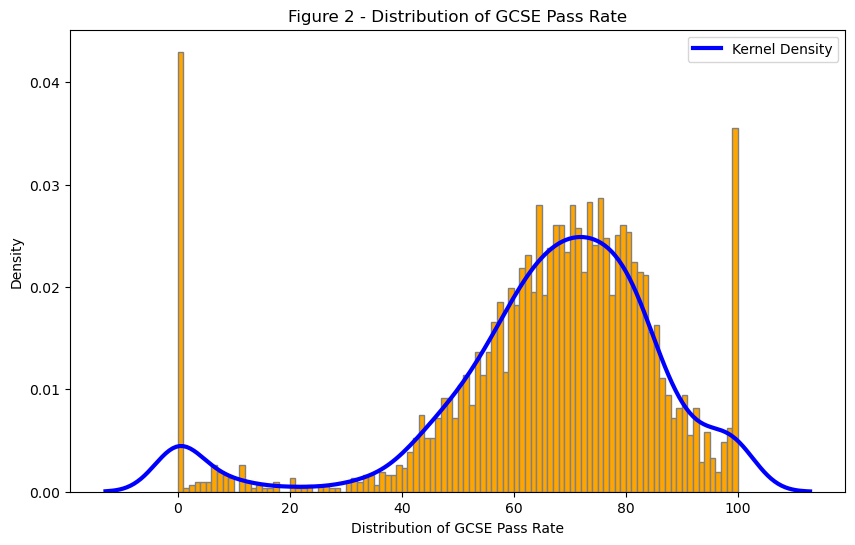

In [32]:
#KDF plot for standardised gcse pass rate 

plt.figure(figsize=(10,6))
plt.hist(df_ols['GCSE Pass Rate'], color='orange',bins=100, edgecolor='grey', density=True)
sns.kdeplot(df_ols['GCSE Pass Rate'], color='blue',linewidth=3, label='Kernel Density')
plt.legend()
plt.xlabel('Distribution of GCSE Pass Rate')

plt.title("Figure 2 - Distribution of GCSE Pass Rate")
plt.show()

In [33]:
#Recreating distribution fig but omitting 0 vals for pass rate

df_ols_no_zeros= df_ols.drop(df_ols[df_ols['GCSE Pass Rate'] == 0].index)

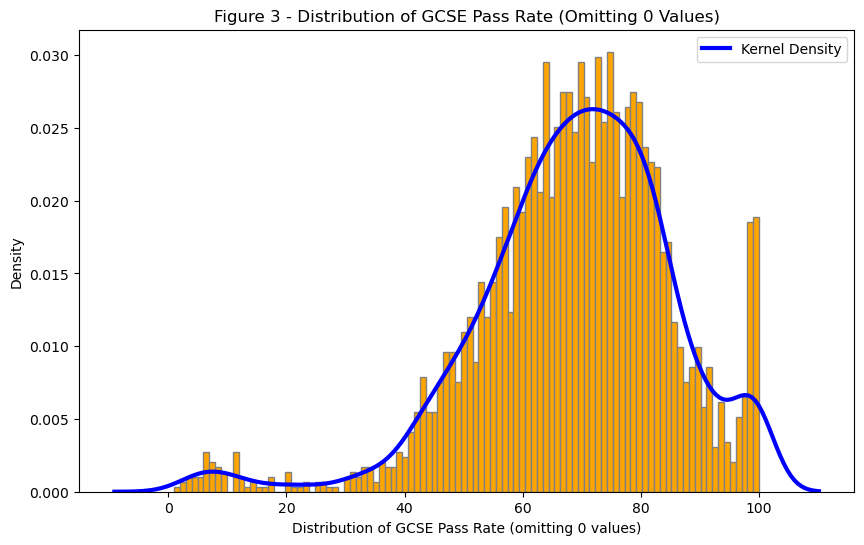

In [34]:
plt.figure(figsize=(10,6))
plt.hist(df_ols_no_zeros['GCSE Pass Rate'], color='orange',bins=100, edgecolor='grey', density=True)
sns.kdeplot(df_ols_no_zeros['GCSE Pass Rate'], color='blue',linewidth=3, label='Kernel Density')
plt.legend()
plt.xlabel('Distribution of GCSE Pass Rate (omitting 0 values)')

plt.title("Figure 3 - Distribution of GCSE Pass Rate (Omitting 0 Values)")
plt.show()

In [35]:
#Pie chart showing different ethnic proportions in each gor region

In [36]:
#'GOR_North_East','GOR_Yorkshire_Humber','GOR_South_East','GOR_South_West','GOR_East_Midlands',
#'GOR_West_Midlands','GOR_East_of_England'

In [38]:
#NORTH EAST 
print(df_ols.loc[(df_ols['gorname'] =="North East" ), 'Proportion_White'].mean(),'white')
print(df_ols.loc[(df_ols['gorname'] =="North East" ), 'Proportion_Black'].mean(),'black')
print(df_ols.loc[(df_ols['gorname'] =="North East" ), 'Proportion_Asian'].mean(),'asian')
print(df_ols.loc[(df_ols['gorname'] =="North East" ), 'Proportion_Mixed'].mean(),'Mixed')
print(df_ols.loc[(df_ols['gorname'] =="North East" ), 'Proportion_Other'].mean(),'other')

0.9316622573951958 white
0.009826547595627342 black
0.03624962887098166 asian
0.012527426398208313 Mixed
0.009734139739986719 other


Text(0.5, 1.0, 'Figure 3 - Pie Chart showing proportion of ethnicities in the North East region ')

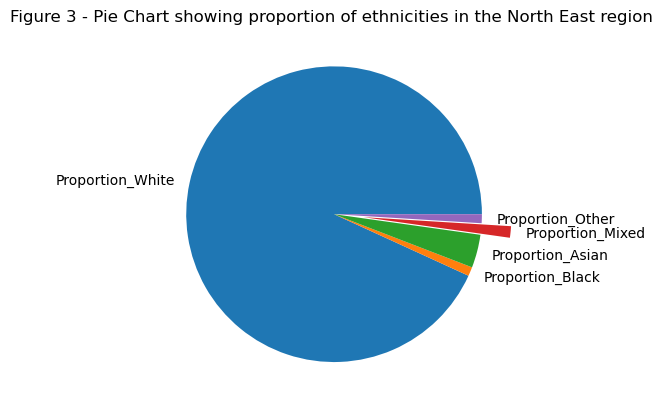

In [39]:
ne_array = np.array([0.9316622573951958,0.009826547595627342,0.03624962887098166,0.012527426398208313,
                     0.009734139739986719])
myexplode=[0, 0, 0, 0.2,0]
mylabels = ['Proportion_White','Proportion_Black',"Proportion_Asian",'Proportion_Mixed','Proportion_Other']

plt.pie(ne_array, labels = mylabels,explode=myexplode)
plt.title('Figure 3 - Pie Chart showing proportion of ethnicities in the North East region ')

In [40]:
#NORTH WEST
print(df_ols.loc[(df_ols['gorname'] =="North West" ), 'Proportion_White'].mean())
print(df_ols.loc[(df_ols['gorname'] =="North West" ), 'Proportion_Black'].mean())
print(df_ols.loc[(df_ols['gorname'] =="North West" ), 'Proportion_Asian'].mean())
print(df_ols.loc[(df_ols['gorname'] =="North West" ), 'Proportion_Mixed'].mean())
print(df_ols.loc[(df_ols['gorname'] =="North West" ), 'Proportion_Other'].mean())

0.8415837252082821
0.025378653950011234
0.09391877962422304
0.023240230574928137
0.01587861064255548


Text(0.5, 1.0, 'Figure 4 - Pie Chart showing proportion of ethnicities in the North West region ')

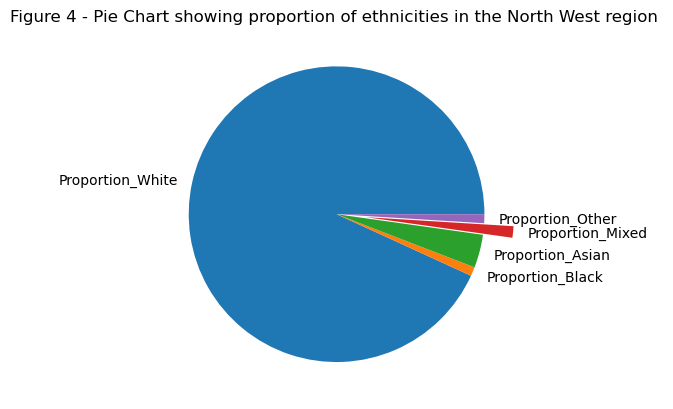

In [42]:
nw_array = np.array([0.8415837252082821,0.025378653950011234,0.09391877962422304,0.023240230574928137,0.01587861064255548])
myexplode=[0, 0, 0, 0.2,0]
mylabels = ['Proportion_White','Proportion_Black',"Proportion_Asian",'Proportion_Mixed','Proportion_Other']

plt.pie(ne_array, labels = mylabels,explode=myexplode)
plt.title('Figure 4 - Pie Chart showing proportion of ethnicities in the North West region ')

In [43]:
#Yorkshire and the humber 
print(df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Proportion_White'].mean())
print(df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Proportion_Black'].mean())
print(df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Proportion_Asian'].mean())
print(df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Proportion_Mixed'].mean())
print(df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Proportion_Other'].mean())

0.8380176050274358
0.023223462670563303
0.10071728999487063
0.022551725253513115
0.015489917053617094


Text(0.5, 1.0, 'Figure 5 - Pie Chart showing proportion of ethnicities in the Yorkshire and Humber region ')

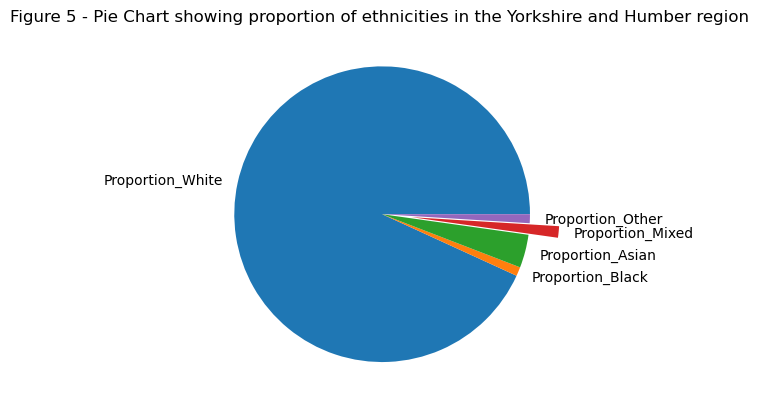

In [44]:
ykh_array = np.array([0.8380176050274358,0.023223462670563303,0.10071728999487063,0.022551725253513115,0.015489917053617094])
myexplode=[0, 0, 0, 0.2,0]
mylabels = ['Proportion_White','Proportion_Black',"Proportion_Asian",'Proportion_Mixed','Proportion_Other']

plt.pie(ne_array, labels = mylabels,explode=myexplode)
plt.title('Figure 5 - Pie Chart showing proportion of ethnicities in the Yorkshire and Humber region ')

In [45]:
#South East
print(df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_White'].mean())
print(df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Black'].mean())
print(df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Asian'].mean())
print(df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Mixed'].mean())
print(df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Other'].mean())


se_array=np.array([(df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Other'].mean())])

se_array

0.8557816421700024
0.025518794031238825
0.07568302607814481
0.027939413808075797
0.015077123912538178


array([0.85578164, 0.02551879, 0.07568303, 0.02793941, 0.01507712])

Text(0.5, 1.0, 'Figure 6 - Pie Chart showing proportion of ethnicities in the South East region ')

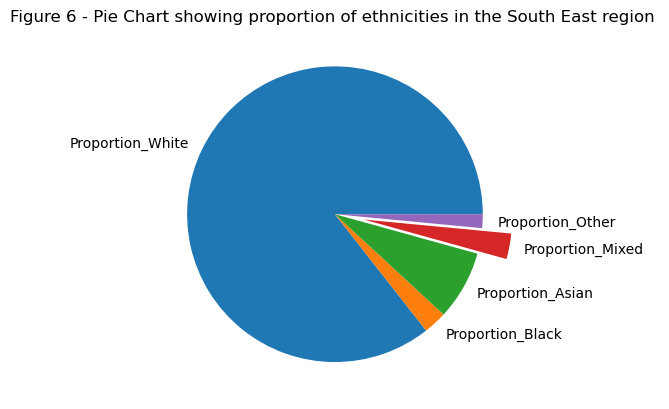

In [46]:
myexplode=[0, 0, 0, 0.2,0]
mylabels = ['Proportion_White','Proportion_Black',"Proportion_Asian",'Proportion_Mixed','Proportion_Other']

plt.pie(se_array, labels = mylabels,explode=myexplode)
plt.title('Figure 6 - Pie Chart showing proportion of ethnicities in the South East region ')

In [47]:
#south west

sw_array=np.array([(df_ols.loc[(df_ols['gorname'] =="South West" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South West" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South West" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South West" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South West" ), 'Proportion_Other'].mean())])

Text(0.5, 1.0, 'Figure 7 - Pie Chart showing proportion of ethnicities in the South East region ')

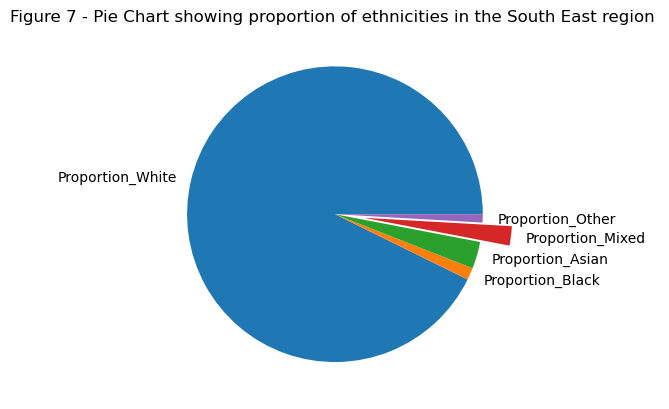

In [48]:
myexplode=[0, 0, 0, 0.2,0]
mylabels = ['Proportion_White','Proportion_Black',"Proportion_Asian",'Proportion_Mixed','Proportion_Other']

plt.pie(sw_array, labels = mylabels,explode=myexplode)
plt.title('Figure 7 - Pie Chart showing proportion of ethnicities in the South East region ')

In [49]:
#west midlands
wm_array=np.array([(df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Other'].mean())])


Text(0.5, 1.0, 'Figure 8 - Pie Chart showing proportion of ethnicities in the West Midlands region ')

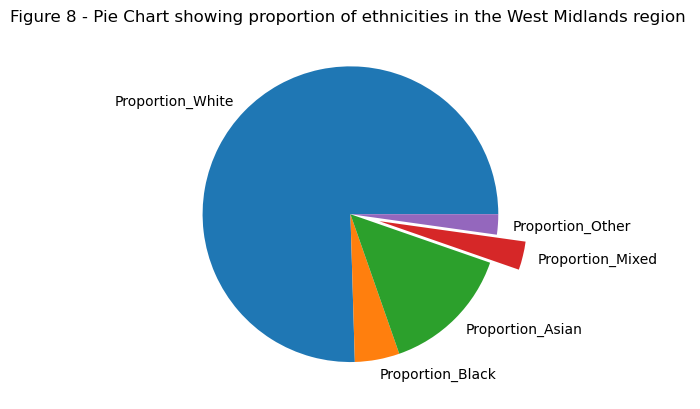

In [50]:
myexplode=[0, 0, 0, 0.2,0]
mylabels = ['Proportion_White','Proportion_Black',"Proportion_Asian",'Proportion_Mixed','Proportion_Other']

plt.pie(wm_array, labels = mylabels,explode=myexplode)
plt.title('Figure 8 - Pie Chart showing proportion of ethnicities in the West Midlands region ')

In [51]:
#east midlands 
em_array=np.array([(df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Proportion_Other'].mean())])

Text(0.5, 1.0, 'Figure 9 - Pie Chart showing proportion of ethnicities in the East Midlands region')

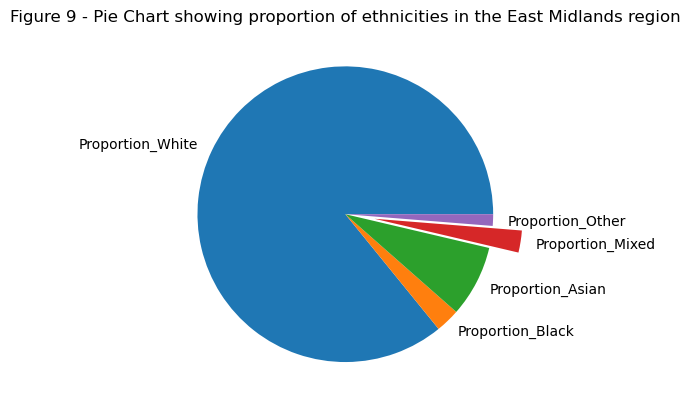

In [52]:
myexplode=[0, 0, 0, 0.2,0]
mylabels = ['Proportion_White','Proportion_Black',"Proportion_Asian",'Proportion_Mixed','Proportion_Other']

plt.pie(em_array, labels = mylabels,explode=myexplode)
plt.title('Figure 9 - Pie Chart showing proportion of ethnicities in the East Midlands region')

In [53]:
#east of england 
eoe_array=np.array([(df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Other'].mean())])

Text(0.5, 1.0, 'Figure 10 - Pie Chart showing proportion of ethnicities in the East of England region ')

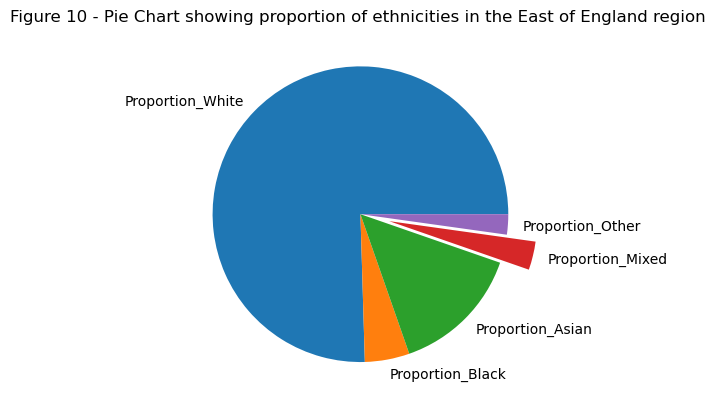

In [54]:
myexplode=[0, 0, 0, 0.2,0]
mylabels = ['Proportion_White','Proportion_Black',"Proportion_Asian",'Proportion_Mixed','Proportion_Other']

plt.pie(eoe_array, labels = mylabels,explode=myexplode)
plt.title('Figure 10 - Pie Chart showing proportion of ethnicities in the East of England region ')

In [55]:
#London

l_array=np.array([(df_ols.loc[(df_ols['gorname'] =="London" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="London" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="London" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="London" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="London" ), 'Proportion_Other'].mean())])

Text(0.5, 1.0, 'Figure 11 - Pie Chart showing proportion of ethnicities in the London region ')

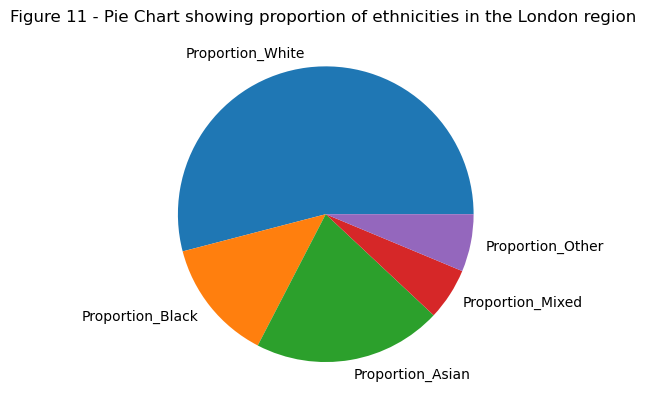

In [56]:
myexplode=[0, 0, 0, 0.2,0]
mylabels = ['Proportion_White','Proportion_Black',"Proportion_Asian",'Proportion_Mixed','Proportion_Other']

plt.pie(l_array, labels = mylabels)
plt.title('Figure 11 - Pie Chart showing proportion of ethnicities in the London region ')

In [57]:
#Plotting ofsted rating schools by gor region 

In [58]:
print(df_ols.loc[(df_ols['gorname'] =="London" ), 'Ofsted'].value_counts())
print(df_ols.loc[(df_ols['gorname'] =="North West" ), 'Ofsted'].value_counts())
print(df_ols.loc[(df_ols['gorname'] =="North East" ), 'Ofsted'].value_counts())
print(df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Ofsted'].value_counts())
print(df_ols.loc[(df_ols['gorname'] =="South East" ), 'Ofsted'].value_counts())
print(df_ols.loc[(df_ols['gorname'] =="South West" ), 'Ofsted'].value_counts())
print(df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Ofsted'].value_counts())
print(df_ols.loc[(df_ols['gorname'] =="East of England" ), 'Ofsted'].value_counts())
print(df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Ofsted'].value_counts())

3    345
4    125
2     39
1     13
Name: Ofsted, dtype: int64
3    278
2     74
4     43
1      9
Name: Ofsted, dtype: int64
3    92
2    26
4    19
1     2
Name: Ofsted, dtype: int64
3    175
4     39
2     34
1     11
Name: Ofsted, dtype: int64
3    346
4     81
2     47
1     11
Name: Ofsted, dtype: int64
3    200
2     35
4     30
1      4
Name: Ofsted, dtype: int64
3    260
2     51
4     47
1     18
Name: Ofsted, dtype: int64
3    237
2     52
4     49
1     10
Name: Ofsted, dtype: int64
3    183
2     44
4     33
1     10
Name: Ofsted, dtype: int64


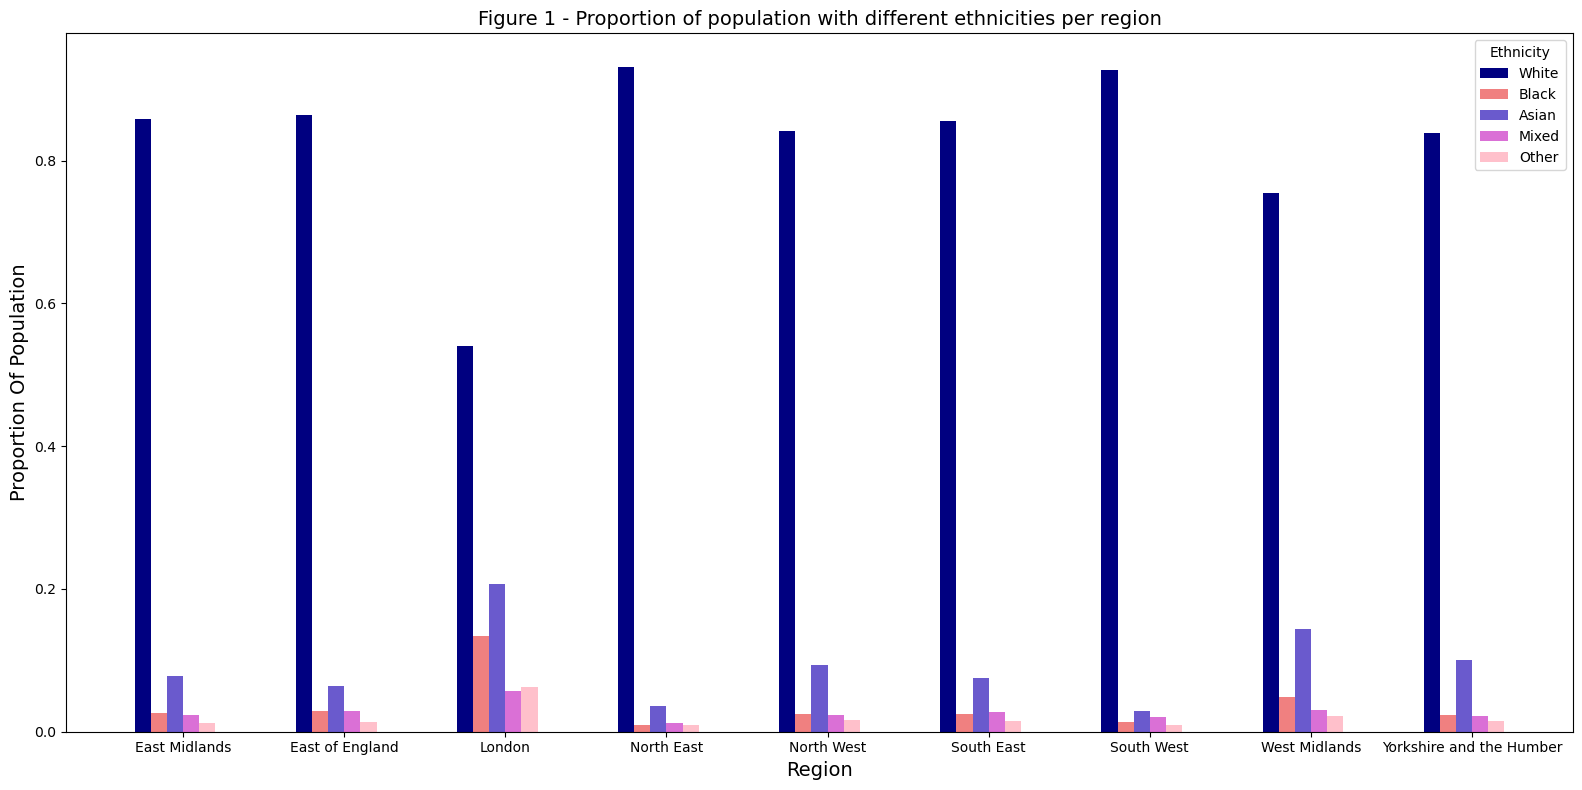

In [59]:
data = {
    'Region': ['London', 'London', 'London', 'London','London',
               'North West', 'North West', 'North West', 'North West','North West', 
               'North East', 'North East', 'North East', 'North East','North East',
               'Yorkshire and the Humber', 'Yorkshire and the Humber','Yorkshire and the Humber',
               'Yorkshire and the Humber', 'Yorkshire and the Humber',
               'South East', 'South East', 'South East', 'South East','South East',
               'South West', 'South West', 'South West', 'South West', 'South West',
               'West Midlands', 'West Midlands', 'West Midlands', 'West Midlands','West Midlands',
               'East of England', 'East of England', 'East of England', 'East of England','East of England',
               'East Midlands', 'East Midlands', 'East Midlands', 'East Midlands','East Midlands'],
    'Ethnicity': ['White', 'Black', 'Asian', 'Mixed','Other',
                      'White', 'Black', 'Asian', 'Mixed','Other',
                      'White', 'Black', 'Asian', 'Mixed','Other',
                      'White', 'Black', 'Asian', 'Mixed','Other',
                      'White', 'Black', 'Asian', 'Mixed','Other',
                      'White', 'Black', 'Asian', 'Mixed','Other',
                      'White', 'Black', 'Asian', 'Mixed','Other',
                      'White', 'Black', 'Asian', 'Mixed','Other',
                      'White', 'Black', 'Asian', 'Mixed','Other'],
    'Proportions': [(df_ols.loc[(df_ols['gorname'] =="London" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="London" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="London" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="London" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="London" ), 'Proportion_Other'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="North West" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="North West" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="North West" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="North West" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="North West" ), 'Proportion_Other'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="North East" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="North East" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="North East" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="North East" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="North East" ), 'Proportion_Other'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="Yorkshire and the Humber" ), 'Proportion_Other'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South East" ), 'Proportion_Other'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South West" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South West" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South West" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South West" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="South West" ), 'Proportion_Other'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="West Midlands" ), 'Proportion_Other'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East of England" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East of England" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East of England" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East of England" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East of England" ), 'Proportion_Other'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Proportion_White'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Proportion_Black'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Proportion_Asian'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Proportion_Mixed'].mean()),
                   (df_ols.loc[(df_ols['gorname'] =="East Midlands" ), 'Proportion_Other'].mean())
                  ]
}

# Create DataFrame
df_ofsted_graph = pd.DataFrame(data)

# Group data by Region and Ethnicity, then calculate the mean Proportion
grouped = df_ofsted_graph.groupby(['Region', 'Ethnicity']).mean().unstack()

# Plotting
plt.figure(figsize=(16, 8))

# Define the number of bars (equal to the number of ethnicities)
num_ethnicities = len(df_ofsted_graph['Ethnicity'].unique())

# Define width of a single bar
bar_width = 0.1

# Define positions for each group of bars
index = np.arange(len(grouped))

#Colours for each ofsted rating
colors = ['navy', 'lightcoral', 'slateblue', 'orchid','pink']

# Plot each ethnicity proportion as a grouped bar
for i, ethnicity in enumerate(df_ofsted_graph['Ethnicity'].unique()):
    plt.bar(index + i * bar_width, grouped['Proportions'][ethnicity], bar_width, label=ethnicity,
            color=colors[i])

plt.xlabel('Region',size=14)
plt.ylabel('Proportion Of Population',size=14)
plt.title('Figure 1 - Proportion of population with different ethnicities per region',size=14)
plt.xticks(index + bar_width * num_ethnicities / 2, grouped.index)
plt.legend(title='Ethnicity')
plt.tight_layout()
plt.show()

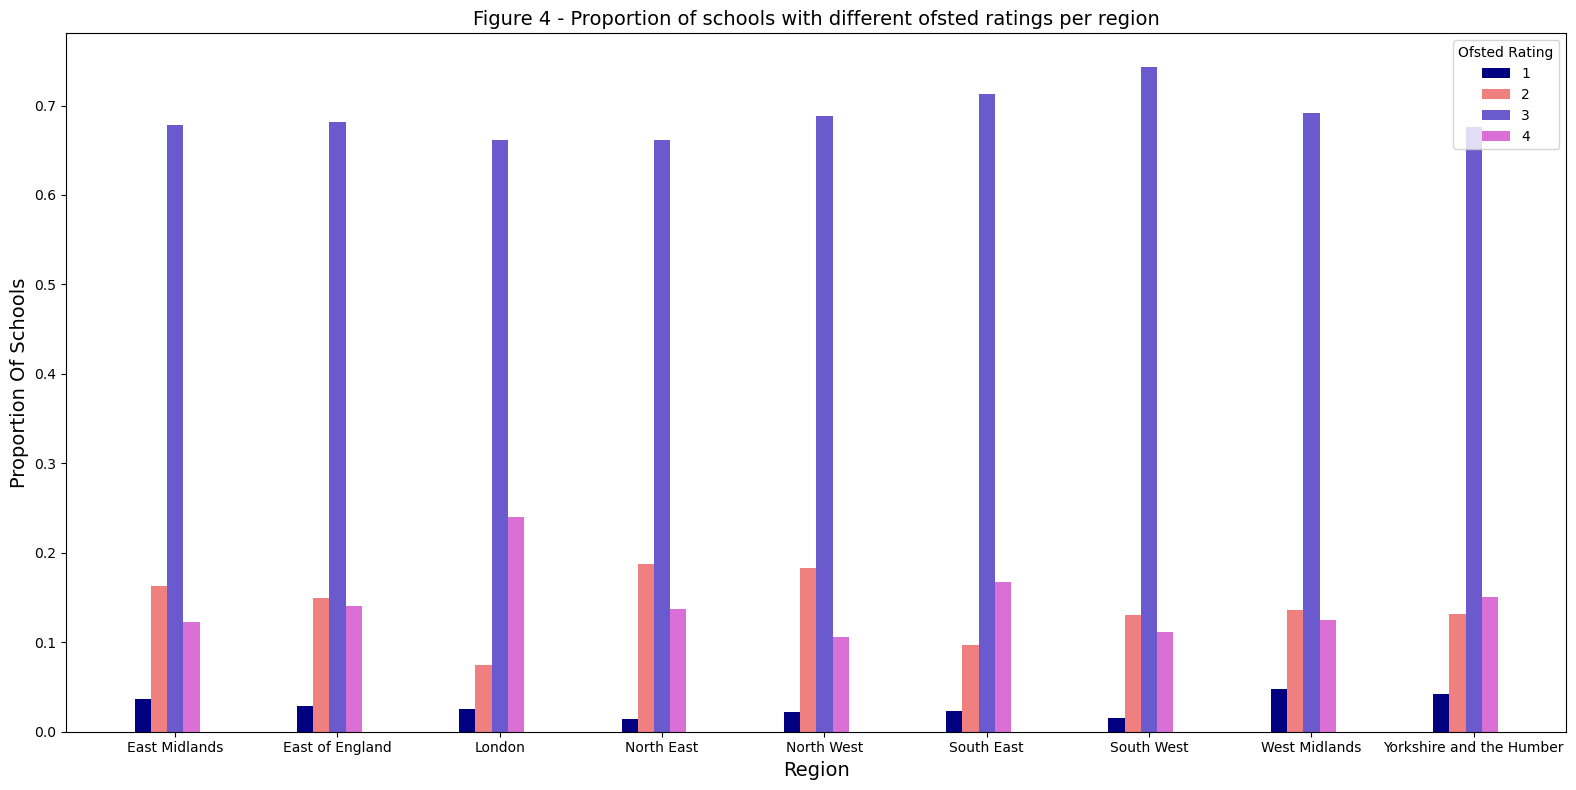

In [60]:
data = {
    'Region': ['London', 'London', 'London', 'London',
               'North West', 'North West', 'North West', 'North West',
               'North East', 'North East', 'North East', 'North East',
               'Yorkshire and the Humber', 'Yorkshire and the Humber',
               'Yorkshire and the Humber', 'Yorkshire and the Humber',
               'South East', 'South East', 'South East', 'South East',
               'South West', 'South West', 'South West', 'South West', 
               'West Midlands', 'West Midlands', 'West Midlands', 'West Midlands',
               'East of England', 'East of England', 'East of England', 'East of England',
               'East Midlands', 'East Midlands', 'East Midlands', 'East Midlands'],
    'Ofsted Rating': ['1', '2', '3', '4',
                      '1', '2', '3', '4',
                      '1', '2', '3', '4',
                      '1', '2', '3', '4',
                      '1', '2', '3', '4',
                      '1', '2', '3', '4',
                      '1', '2', '3', '4',
                      '1', '2', '3', '4',
                      '1', '2', '3', '4'],
    'Proportion': [13/522, 39/522, 345/522, 125/522,
                   9/404, 74/404, 278/404, 43/404,
                   2/139, 26/139, 92/139, 19/139,
                   11/259, 34/259,175/259,39/259,
                   11/485, 47/485, 346/485, 81/485,
                   4/269, 35/269, 200/269, 30/269,
                   18/376, 51/376, 260/376, 47/376,
                   10/348, 52/348, 237/348, 49/348,
                   10/270, 44/270, 183/270, 33/270]
}

# Create DataFrame
df_ofsted_graph = pd.DataFrame(data)

# Group data by Region and Ethnicity, then calculate the mean Proportion
grouped = df_ofsted_graph.groupby(['Region', 'Ofsted Rating']).mean().unstack()

# Plotting
plt.figure(figsize=(16, 8))

# Define the number of bars (equal to the number of ethnicities)
num_ethnicities = len(df_ofsted_graph['Ofsted Rating'].unique())

# Define width of a single bar
bar_width = 0.1

# Define positions for each group of bars
index = np.arange(len(grouped))

#Colours for each ofsted rating
colors = ['navy', 'lightcoral', 'slateblue', 'orchid']

# Plot each ethnicity proportion as a grouped bar
for i, ethnicity in enumerate(df_ofsted_graph['Ofsted Rating'].unique()):
    plt.bar(index + i * bar_width, grouped['Proportion'][ethnicity], bar_width, label=ethnicity,
            color=colors[i])

plt.xlabel('Region',size=14)
plt.ylabel('Proportion Of Schools',size=14)
plt.title('Figure 4 - Proportion of schools with different ofsted ratings per region',size=14)
plt.xticks(index + bar_width * num_ethnicities / 2, grouped.index)
plt.legend(title='Ofsted Rating')
plt.tight_layout()
plt.show()

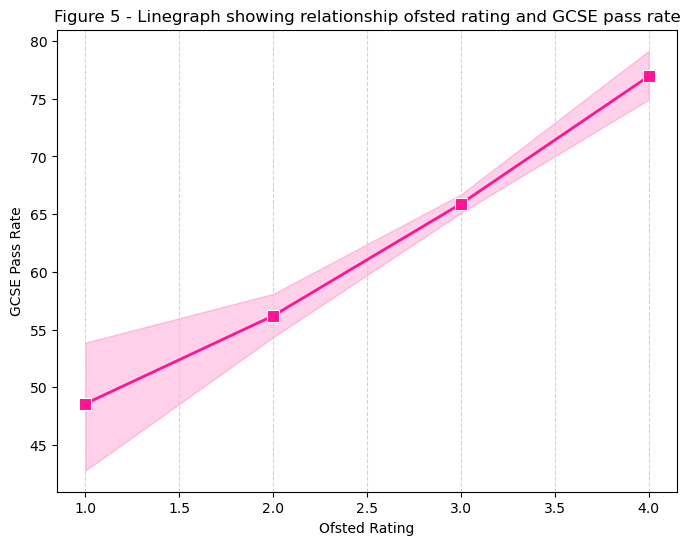

In [61]:
#Linegraph of ofsted rating and gcse pass rate 

plt.figure(figsize=(8,6))
sns.lineplot(y="GCSE Pass Rate", x="Ofsted", data=df_ols,linewidth=2,markersize=8,marker='s',color='deeppink')
plt.ylabel('GCSE Pass Rate')
plt.xlabel('Ofsted Rating')
plt.grid(axis='x', linestyle='dashed', color='lightgrey')
plt.title("Figure 5 - Linegraph showing relationship ofsted rating and GCSE pass rate")
plt.show()

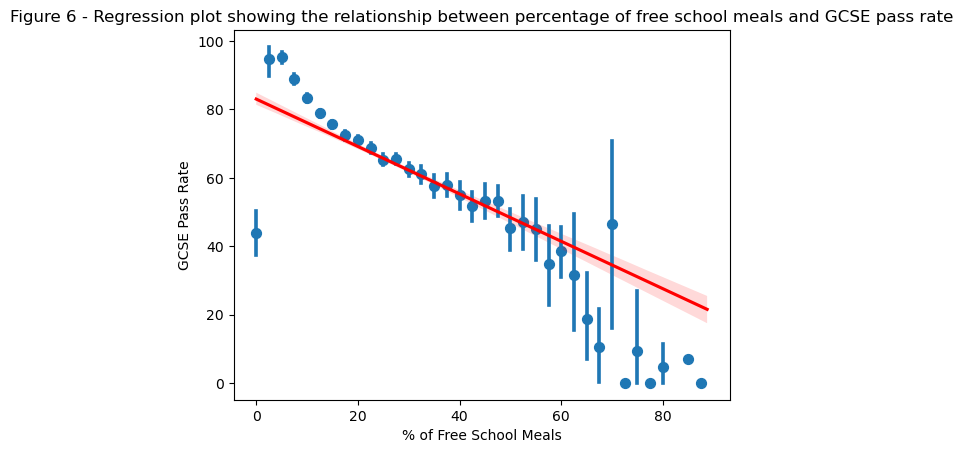

In [62]:
#Regplot of fsm% on GCSE pass rate

sns.regplot(data=df_ols, x='% of students on free school meals', y='GCSE Pass Rate',line_kws=dict(color="r"),
           x_bins=np.arange(0, 120,2.5))
plt.xlabel("% of Free School Meals")
plt.title('Figure 6 - Regression plot showing the relationship between percentage of free school meals and GCSE pass rate',
         fontsize = 12)
plt.show()

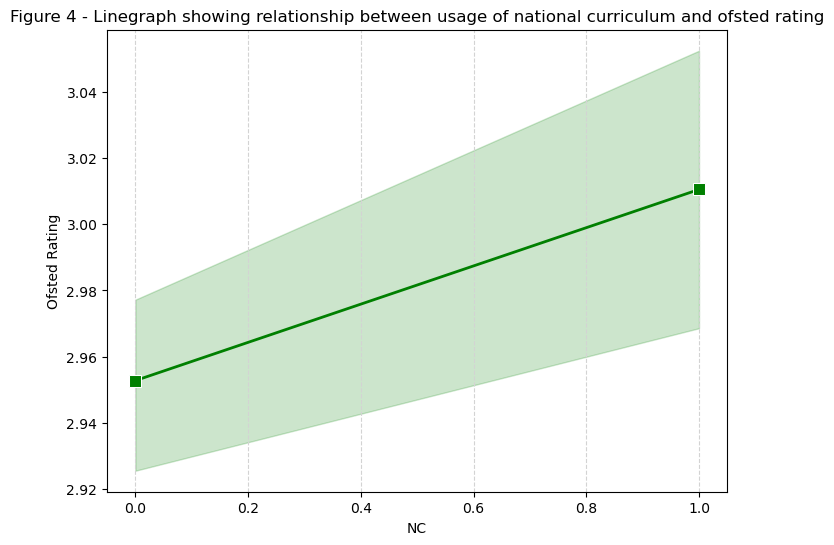

In [63]:
#Scatterplot for NC on ofsted rating

#if schools follow national curriculum NC=1
plt.figure(figsize=(8,6))
sns.lineplot(x="NC", y="Ofsted", data=df_ols, marker='s', linewidth=2, markersize=8,color='green')
plt.ylabel('Ofsted Rating')
plt.xlabel('NC')
plt.grid(axis='x', linestyle='dashed', color='lightgrey')
plt.title("Figure 4 - Linegraph showing relationship between usage of national curriculum and ofsted rating")
plt.show()

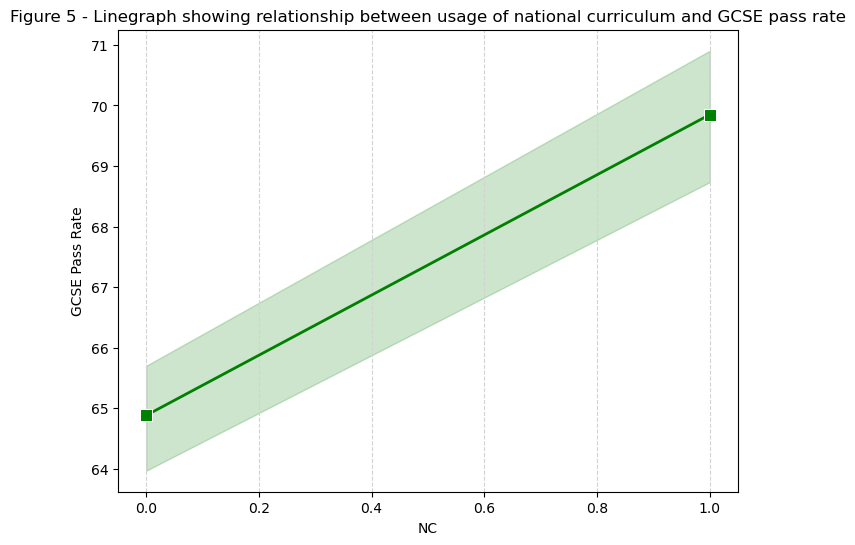

In [64]:
#Scatterplot for NC on standardised GCSE Pass Rate

#if schools follow national curriculum NC=1
plt.figure(figsize=(8,6))
sns.lineplot(x="NC", y="GCSE Pass Rate", data=df_ols, marker='s', linewidth=2, markersize=8,color='green')
plt.ylabel('GCSE Pass Rate')
plt.xlabel('NC')
plt.grid(axis='x', linestyle='dashed', color='lightgrey')
plt.title("Figure 5 - Linegraph showing relationship between usage of national curriculum and GCSE pass rate")
plt.show()

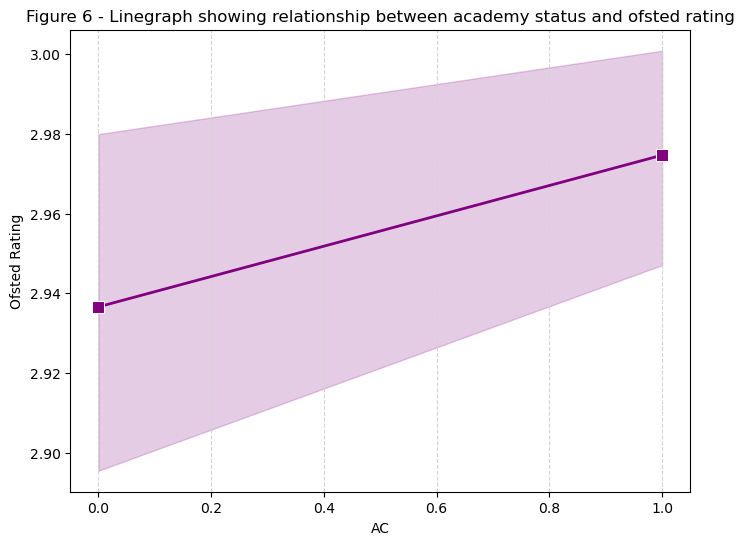

In [65]:
#Scatterplot for AC on ofsted rating

#if schools are academies AC=1
plt.figure(figsize=(8,6))
sns.lineplot(x="AC", y="Ofsted", data=df_ols, marker='s', linewidth=2, markersize=8,color='purple')
plt.ylabel('Ofsted Rating')
plt.xlabel('AC')
plt.grid(axis='x', linestyle='dashed', color='lightgrey')
plt.title("Figure 6 - Linegraph showing relationship between academy status and ofsted rating")
plt.show()

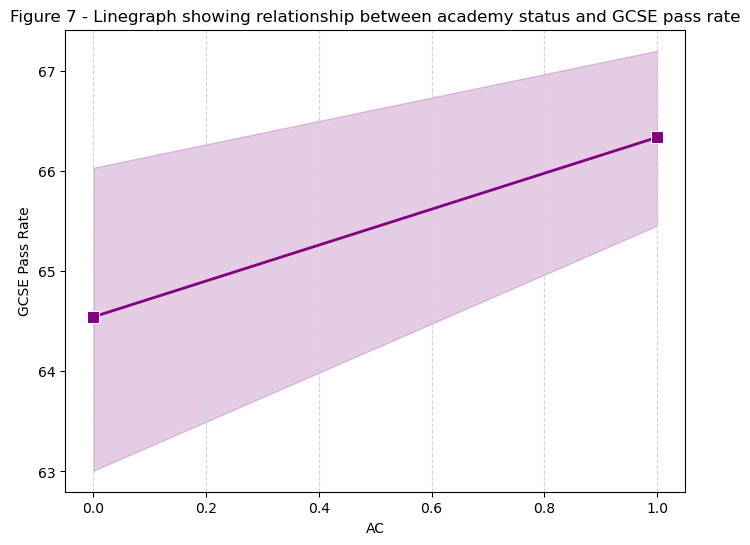

In [66]:
#Scatterplot for AC on standardised GCSE Pass Rate

#if schools are academies AC=1
plt.figure(figsize=(8,6))
sns.lineplot(x="AC", y="GCSE Pass Rate", data=df_ols, marker='s', linewidth=2, markersize=8,color='purple')
plt.ylabel('GCSE Pass Rate')
plt.xlabel('AC')
plt.grid(axis='x', linestyle='dashed', color='lightgrey')
plt.title("Figure 7 - Linegraph showing relationship between academy status and GCSE pass rate")
plt.show()

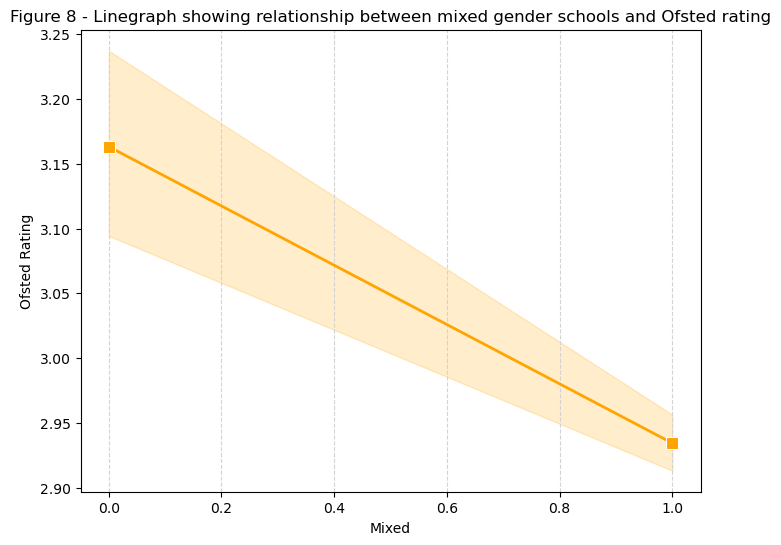

In [67]:
#Scatterplot for Mixed (gender) on ofsted rating

#if schools are mixed gender Mixed=1
plt.figure(figsize=(8,6))
sns.lineplot(x="Mixed", y="Ofsted", data=df_ols, marker='s', linewidth=2, markersize=8,color='orange')
plt.ylabel('Ofsted Rating')
plt.xlabel('Mixed')
plt.grid(axis='x', linestyle='dashed', color='lightgrey')
plt.title("Figure 8 - Linegraph showing relationship between mixed gender schools and Ofsted rating")
plt.show()

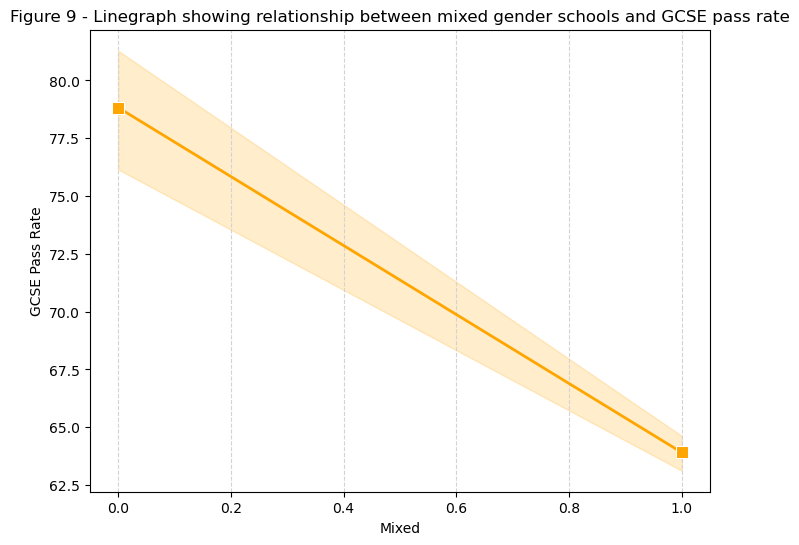

In [68]:
#Scatterplot for Mixed (gender) on standardised GCSE Pass Rate

#if schools are mixed gender Mixed=1
plt.figure(figsize=(8,6))
sns.lineplot(x="Mixed", y="GCSE Pass Rate", data=df_ols, marker='s', linewidth=2, markersize=8,color='orange')
plt.ylabel('GCSE Pass Rate')
plt.xlabel('Mixed')
plt.grid(axis='x', linestyle='dashed', color='lightgrey')
plt.title("Figure 9 - Linegraph showing relationship between mixed gender schools and GCSE pass rate")
plt.show()

In [69]:
#Regression 1 - GCSE results on mixed, ac, nc, sixth form status,ofsted, ethnic pop of region school is in and % of fsm 

x = df_ols[["Mixed","AC","NC","% of students on free school meals","S","Ofsted"]]
y =df_ols["GCSE Pass Rate"]

X = sm.add_constant(x)

model = sm.OLS(y,X).fit(cov_type="hc0")

model.summary(title="Table 2 - OLS Regression Results")

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Table 2 - OLS Regression Results                       
==============================================================================
Dep. Variable:         GCSE Pass Rate   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     290.2
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          5.69e-295
Time:                        15:59:00   Log-Likelihood:                -13083.
No. Observations:                3072   AIC:                         2.618e+04
Df Residuals:                    3065   BIC:                         2.622e+04
Df Model:                           6                                         
Covariance Type:                  hc0                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 55.3800      3.221     17.194      0.000      49.067      61.693
Mixed                                 -8.6886      1.132     -7.677      0.000     -10.907      -6.470
AC                                    18.0734      1.933      9.352      0.000      14.286      21.861
NC                                    20.5564      1.975     10.410      0.000      16.686      24.427
% of students on free school meals    -0.6810      0.032    -21.472      0.000      -0.743      -0.619
S                                      1.6868      0.669      2.520      0.012       0.375       2.999
Ofsted                                 5.8265      0.648      8.986      0.000       4.556       7.097
==============================================================================
Omnibus:                     1020.280   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4016.649
Skew:                          -1.598   Prob(JB):                         0.00
Kurtosis:                       7.600   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [70]:
#Regression 2 - GCSE pass rate on mixed, ac, nc, %fsm , sixth form 

x = df_ols[["Mixed","AC","NC","% of students on free school meals","S"]]
y =df_ols["GCSE Pass Rate"]

X = sm.add_constant(x)

model = sm.OLS(y,X).fit(cov_type="hc0")

model.summary(title="Table 3 - OLS Regression Results")

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Table 3 - OLS Regression Results                       
==============================================================================
Dep. Variable:         GCSE Pass Rate   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     241.1
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.09e-217
Time:                        15:59:08   Log-Likelihood:                -13148.
No. Observations:                3072   AIC:                         2.631e+04
Df Residuals:                    3066   BIC:                         2.634e+04
Df Model:                           5                                         
Covariance Type:                  hc0                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 72.6531      2.322     31.284      0.000      68.101      77.205
Mixed                                 -9.7247      1.154     -8.429      0.000     -11.986      -7.463
AC                                    19.4699      2.005      9.710      0.000      15.540      23.400
NC                                    22.1681      2.042     10.854      0.000      18.165      26.171
% of students on free school meals    -0.7168      0.030    -23.591      0.000      -0.776      -0.657
S                                      2.4958      0.696      3.587      0.000       1.132       3.860
==============================================================================
Omnibus:                      890.827   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3217.515
Skew:                          -1.412   Prob(JB):                         0.00
Kurtosis:                       7.143   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [80]:
df_ols['p_a_100'] = df_ols['Proportion_Asian']*100

In [82]:
#Regression 3 - same as reg 1 but with ethnicity proportions 

#prop white is reference proportion 
x = df_ols[["Mixed","AC","NC","% of students on free school meals","S",'Proportion_Asian',
            'Proportion_Black','Proportion_Mixed','Proportion_Other']]
y =df_ols["GCSE Pass Rate"]

X = sm.add_constant(x)

model = sm.OLS(y,X).fit(cov_type="hc0")


model.summary(title="Table 4 - OLS Regression Results")

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Table 4 - OLS Regression Results                       
==============================================================================
Dep. Variable:         GCSE Pass Rate   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     151.9
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          6.48e-238
Time:                        16:33:16   Log-Likelihood:                -13082.
No. Observations:                3072   AIC:                         2.618e+04
Df Residuals:                    3062   BIC:                         2.624e+04
Df Model:                           9                                         
Covariance Type:                  hc0                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 66.4512      2.481     26.782      0.000      61.588      71.314
Mixed                                 -7.2518      1.205     -6.016      0.000      -9.614      -4.889
AC                                    22.7459      1.994     11.405      0.000      18.837      26.655
NC                                    24.1750      2.036     11.873      0.000      20.184      28.166
% of students on free school meals    -0.7900      0.031    -25.211      0.000      -0.851      -0.729
S                                      1.2304      0.706      1.742      0.081      -0.154       2.614
Proportion_Asian                      15.8326      4.205      3.765      0.000       7.591      24.074
Proportion_Black                      19.8748     13.490      1.473      0.141      -6.565      46.314
Proportion_Mixed                     -13.7122     46.395     -0.296      0.768    -104.644      77.219
Proportion_Other                      79.3949     27.911      2.845      0.004      24.690     134.100
==============================================================================
Omnibus:                      979.316   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3929.895
Skew:                          -1.521   Prob(JB):                         0.00
Kurtosis:                       7.632   Cond. No.                     4.00e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large,  4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
#Regression 4 - same as reg 2 but with GOR region dummies

#GOR_North_West -> as reference region 

#The purpose of doing so is that the GOR dummies will then control for anything that is GOR specific and the 
#estimated effect of AC status will come from variation in AC status within region 
#as opposed to across the entire nation

x = df_ols[["Mixed","AC","NC","% of students on free school meals","S",'GOR_London',
            'GOR_North_East','GOR_Yorkshire_Humber','GOR_South_East','GOR_South_West','GOR_East_Midlands',
            'GOR_West_Midlands','GOR_East_of_England']]
y =df_ols["GCSE Pass Rate"]

X = sm.add_constant(x)

model = sm.OLS(y,X).fit(cov_type="hc0")


model.summary(title="Table 5 - OLS Regression Results")

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Table 5 - OLS Regression Results                       
==============================================================================
Dep. Variable:         GCSE Pass Rate   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     102.9
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          2.02e-229
Time:                        15:59:17   Log-Likelihood:                -13092.
No. Observations:                3072   AIC:                         2.621e+04
Df Residuals:                    3058   BIC:                         2.630e+04
Df Model:                          13                                         
Covariance Type:                  hc0                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 70.9026      2.562     27.671      0.000      65.880      75.925
Mixed                                 -7.9397      1.205     -6.591      0.000     -10.301      -5.579
AC                                    21.3529      2.004     10.657      0.000      17.426      25.280
NC                                    23.1419      2.054     11.267      0.000      19.116      27.168
% of students on free school meals    -0.7790      0.032    -24.648      0.000      -0.841      -0.717
S                                      1.8395      0.708      2.597      0.009       0.451       3.228
GOR_London                             6.7703      1.376      4.920      0.000       4.073       9.467
GOR_North_East                         3.9831      1.520      2.620      0.009       1.004       6.963
GOR_Yorkshire_Humber                   3.3039      1.201      2.752      0.006       0.951       5.657
GOR_South_East                        -2.3863      1.204     -1.982      0.047      -4.746      -0.027
GOR_South_West                        -2.7974      1.258     -2.224      0.026      -5.262      -0.333
GOR_East_Midlands                     -0.7959      1.292     -0.616      0.538      -3.328       1.736
GOR_West_Midlands                      0.8015      1.345      0.596      0.551      -1.835       3.438
GOR_East_of_England                   -3.4035      1.317     -2.585      0.010      -5.984      -0.823
==============================================================================
Omnibus:                      959.658   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3845.302
Skew:                          -1.488   Prob(JB):                         0.00
Kurtosis:                       7.603   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [73]:
#Regression 5 - same as reg 2 but with ethnicity + region dummies
#Getting rid of %fsm -> gets rid of multicollinearity issue


x = df_ols[["Mixed","AC","NC","% of students on free school meals","S",'GOR_London',
            'GOR_North_East','GOR_Yorkshire_Humber','GOR_South_East','GOR_South_West','GOR_East_Midlands',
            'GOR_West_Midlands','GOR_East_of_England','Proportion_Asian',
            'Proportion_Black','Proportion_Mixed','Proportion_Other']]
y =df_ols["GCSE Pass Rate"]

X = sm.add_constant(x)

model = sm.OLS(y,X).fit(cov_type="hc0")


model.summary(title="Table 5 - OLS Regression Results")

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Table 5 - OLS Regression Results                       
==============================================================================
Dep. Variable:         GCSE Pass Rate   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     83.17
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          5.00e-237
Time:                        15:59:21   Log-Likelihood:                -13058.
No. Observations:                3072   AIC:                         2.615e+04
Df Residuals:                    3054   BIC:                         2.626e+04
Df Model:                          17                                         
Covariance Type:                  hc0                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 65.6274      2.634     24.912      0.000      60.464      70.791
Mixed                                 -6.9100      1.202     -5.748      0.000      -9.266      -4.554
AC                                    23.2430      1.998     11.633      0.000      19.327      27.159
NC                                    24.5227      2.053     11.947      0.000      20.500      28.546
% of students on free school meals    -0.8253      0.033    -24.815      0.000      -0.891      -0.760
S                                      1.4044      0.711      1.975      0.048       0.011       2.798
GOR_London                            -0.6434      1.893     -0.340      0.734      -4.353       3.067
GOR_North_East                         6.2171      1.536      4.048      0.000       3.207       9.227
GOR_Yorkshire_Humber                   3.1919      1.187      2.690      0.007       0.866       5.518
GOR_South_East                        -2.7896      1.206     -2.313      0.021      -5.154      -0.425
GOR_South_West                        -1.6177      1.256     -1.288      0.198      -4.079       0.844
GOR_East_Midlands                     -0.8210      1.292     -0.635      0.525      -3.354       1.712
GOR_West_Midlands                     -1.1183      1.326     -0.843      0.399      -3.718       1.481
GOR_East_of_England                   -3.7331      1.349     -2.767      0.006      -6.378      -1.088
Proportion_Asian                      14.8760      4.285      3.472      0.001       6.478      23.274
Proportion_Black                       9.5920     14.404      0.666      0.505     -18.639      37.823
Proportion_Mixed                      79.4314     48.759      1.629      0.103     -16.134     174.997
Proportion_Other                      51.7240     30.723      1.684      0.092      -8.492     111.940
==============================================================================
Omnibus:                     1003.672   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4297.317
Skew:                          -1.537   Prob(JB):                         0.00
Kurtosis:                       7.912   Cond. No.                     4.25e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 4.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
#Adding number of schools rated ofsted 3 or 4 for each district -> need to figure out how to do it for each district
#then add to gpd dataset -> maybe then chloropleth map works?

df.loc[(df['ofstedratingcode'].isin([3, 4])) & (df['geographycode'] =="E09000007" ), 'ofstedratingcode'].count()


8